In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:

df_cust=pd.read_csv(r'D:\0-LHL-Activities\W05\Mini-project-III\Data\twm_customer.csv',sep=';') 


df_cust.head(100)



,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1363257,31910,44,4,0,M,1,Mr.,Terry ...,Panfilov ...,15489,Fifth ...,10118,New York City,NY
96,1362767,0,17,2,0,F,1,,Nellie ...,Elliot ...,16726,D ...,60606,Chicago,IL
97,1362849,22001,44,4,0,F,1,,Lorraine ...,Knowles ...,10246,Division ...,37209,Nashville,TN
98,1362563,14711,73,3,0,M,2,,Yunqing ...,McHugh ...,9266,D ...,60647,Chicago,IL


In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [4]:
df_cust['marital_status'].value_counts()

2    353
1    276
4     70
3     48
Name: marital_status, dtype: int64

In [5]:
df_cust_cluster=df_cust.drop(['name_prefix','first_name','last_name','street_nbr','street_name','postal_code','city_name',
                              'state_code'],axis=1)

In [6]:
# Trim whitespace from ends of each value across all series in dataframe

def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

df_cust_cluster = trim_all_columns(df_cust_cluster)


In [7]:
df_cust_cluster.loc[ df_cust_cluster['gender'] == 'M', 'gender'] = 1
df_cust_cluster.loc[ df_cust_cluster['gender'] == 'F', 'gender'] = 0
df_cust_cluster["gender"] = pd.to_numeric(df_cust_cluster["gender"])


In [8]:
df_cust_cluster.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
0,1362691,26150,46,5,1,1,2
1,1362487,6605,71,1,0,1,2
2,1363160,18548,38,8,0,0,1
3,1362752,47668,54,3,0,0,1
4,1362548,44554,59,9,2,0,4


In [9]:
df_cust_cluster.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,0.440428,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,0.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000


In [10]:
L=df_cust_cluster['income'].mean()-3*df_cust_cluster['income'].std()
U=df_cust_cluster['income'].mean()+3*df_cust_cluster['income'].std()

In [11]:
df_cust_cluster_O=df_cust_cluster[ ( df_cust_cluster['income']>U ) | ( df_cust_cluster['income']<L )]

In [12]:
df_cust_cluster_O.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
64,1363442,144157,58,5,0,1,2
108,1363011,90248,55,5,0,1,4
153,1363009,95585,53,3,1,1,2
246,1362820,129196,55,5,2,1,3
339,1363182,101177,50,0,0,0,2


In [13]:
#sns.pairplot(df_cust_cluster)
#plt.show()

# Clusterig

In [14]:
def clip_outliers(df ,List, std_coeff=3 ):
    for c in List:
        if ( ( df[c].dtypes == 'int64' )  |  ( df[c].dtypes == 'float' ) ):
            L=df[c].mean()-std_coeff*df[c].std()
            U=df[c].mean()+std_coeff*df[c].std()
            df[c]=df[c].clip(L, U) #, inplace= True, axis= 1)
    return df

df_cust_cluster_clipped = clip_outliers(df_cust_cluster, ['income'], 3)

df_cust_cluster_clipped.describe()


            
    

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22382.140950,42.479250,3.907631,0.714859,0.440428,1.882195
std,2.925255e+02,20825.544883,19.114879,2.675634,1.103410,0.496771,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,0.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000
max,1.363495e+06,89349.945341,89.000000,9.000000,5.000000,1.000000,4.000000


In [15]:
X=df_cust_cluster_clipped.drop('cust_id',axis=1)

MMS=MinMaxScaler()
Xnorm=MMS.fit_transform(X)
kmean_model=KMeans(random_state=2023,n_clusters=3,max_iter=300)
kmean_model.fit(Xnorm)


KMeans(n_clusters=3, random_state=2023)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


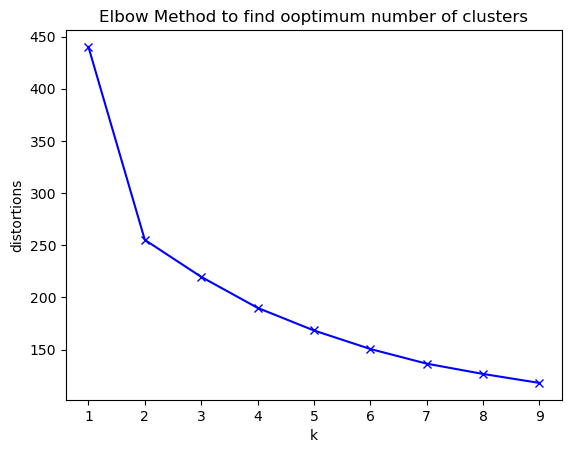

In [16]:
# Elbow Method to find ooptimum number of clusters

distortions=[]
K=range(1,10)

for k in K:
    model=KMeans(n_clusters=k)
    model.fit(Xnorm)
    distortions.append(model.inertia_)

plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('Elbow Method to find ooptimum number of clusters')
plt.show()

In [17]:
X=df_cust_cluster_clipped.drop('cust_id',axis=1)

MMS=MinMaxScaler()
Xnorm=MMS.fit_transform(X)
kmean_model=KMeans(random_state=2023,n_clusters=2,max_iter=300)
kmean_model.fit(Xnorm)


KMeans(n_clusters=2, random_state=2023)

In [18]:
L=kmean_model.labels_
L

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [19]:
# Cluster centroids without scaling
MMS.inverse_transform(kmean_model.cluster_centers_)

array([[1.97525690e+04, 4.23349282e+01, 3.89712919e+00, 7.05741627e-01,
        1.55431223e-15, 1.88277512e+00],
       [2.57230561e+04, 4.26626140e+01, 3.92097264e+00, 7.26443769e-01,
        1.00000000e+00, 1.88145897e+00]])

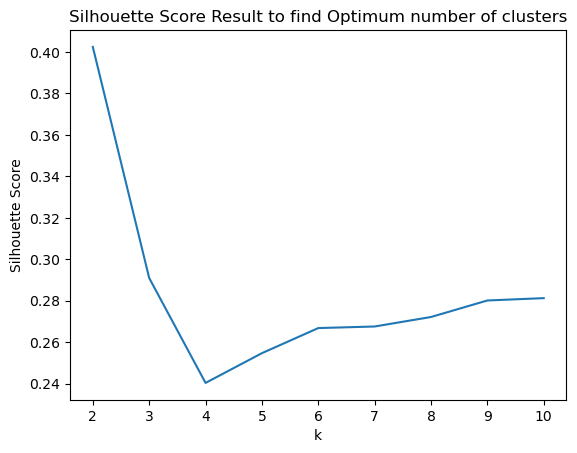

In [20]:
sil=[]
K=range(2,11)

for k in K:
    model=KMeans(n_clusters=k)
    model.fit(Xnorm)
    L=model.labels_
    sil.append(silhouette_score(Xnorm,L))

plt.plot(K,sil)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Result to find Optimum number of clusters')
plt.show()
